In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

carID An attribute that contains an identifier for each car. <br>
Brand The car’s main brand (e.g. Ford, Toyota) <br>
model The car model <br>
year The year of Registration of the Car <br>
mileage The total reported distance travelled by the car (in
miles) <br>
tax The amount of road tax (in £) that, in 2020, was
applicable to the car in question. <br>
fuelType Type of Fuel used by the car (Diesel, Petrol, Hybrid,
Electric) <br>
mpg Average Miles per Gallon <br>
engineSize Size of Engine in liters (Cubic Decimeters) <br>
paintQuality%
The mechanic’s assessment of the cars’ overall paint 
quality and hull integrity (filled by the mechanic
during evaluation). <br>
previousOwners Number of previous registered owners of the vehicle. <br>
hasDamage 
Boolean marker filled by the seller at the time of
registration stating whether the car is damaged or
not. <br>
price The car’s price when purchased by Cars 4 You (in £).

In [2]:
cars = pd.read_csv('project_data/train.csv')
cars.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [3]:
cars.shape

(75973, 14)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [6]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carID,75973.0,NaN,NaN,NaN,37986.0,21931.660338,0.0,18993.0,37986.0,56979.0,75972.0
Brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuelType,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8


In [11]:
cars.replace("", np.nan, inplace=True)

In [12]:
cars.isna().sum()

carID                0
Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

In [8]:
cars.duplicated().sum()

np.int64(0)

In [15]:
cars['previousOwners'].unique()

array([ 4.        ,  1.        , -2.34030622,  3.        ,  0.        ,
        2.        ,         nan, -2.34565   ,  6.25837066, -2.33512284,
        6.22789796,  6.25823052,  6.23017958, -2.33936045,  6.21772443,
        6.24583495, -2.29943868, -2.34010209, -2.31225953,  6.2482512 ,
       -2.31733109,  6.23308217,  6.24177863, -2.33744529])

In [17]:
cars['tax']

0          NaN
1        145.0
2        145.0
3        145.0
4        145.0
         ...  
75968    125.0
75969    200.0
75970    145.0
75971    125.0
75972    145.0
Name: tax, Length: 75973, dtype: float64

#### Data Preprocessing

In [25]:
non_metric_features = ['Brand', 'model', 'transmission', 'fuelType','hasDamage']
metric_features = cars.columns.drop(non_metric_features).to_list()

In [26]:
metric_features

['carID',
 'year',
 'price',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners']

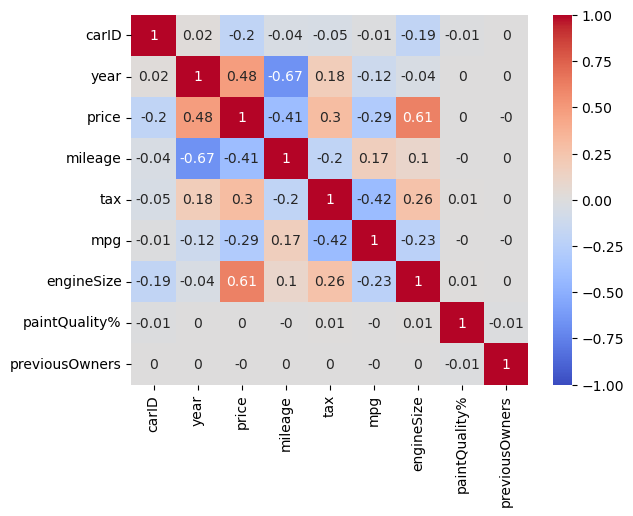

In [27]:
corr = cars[metric_features].corr(method="pearson").round(2)
# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

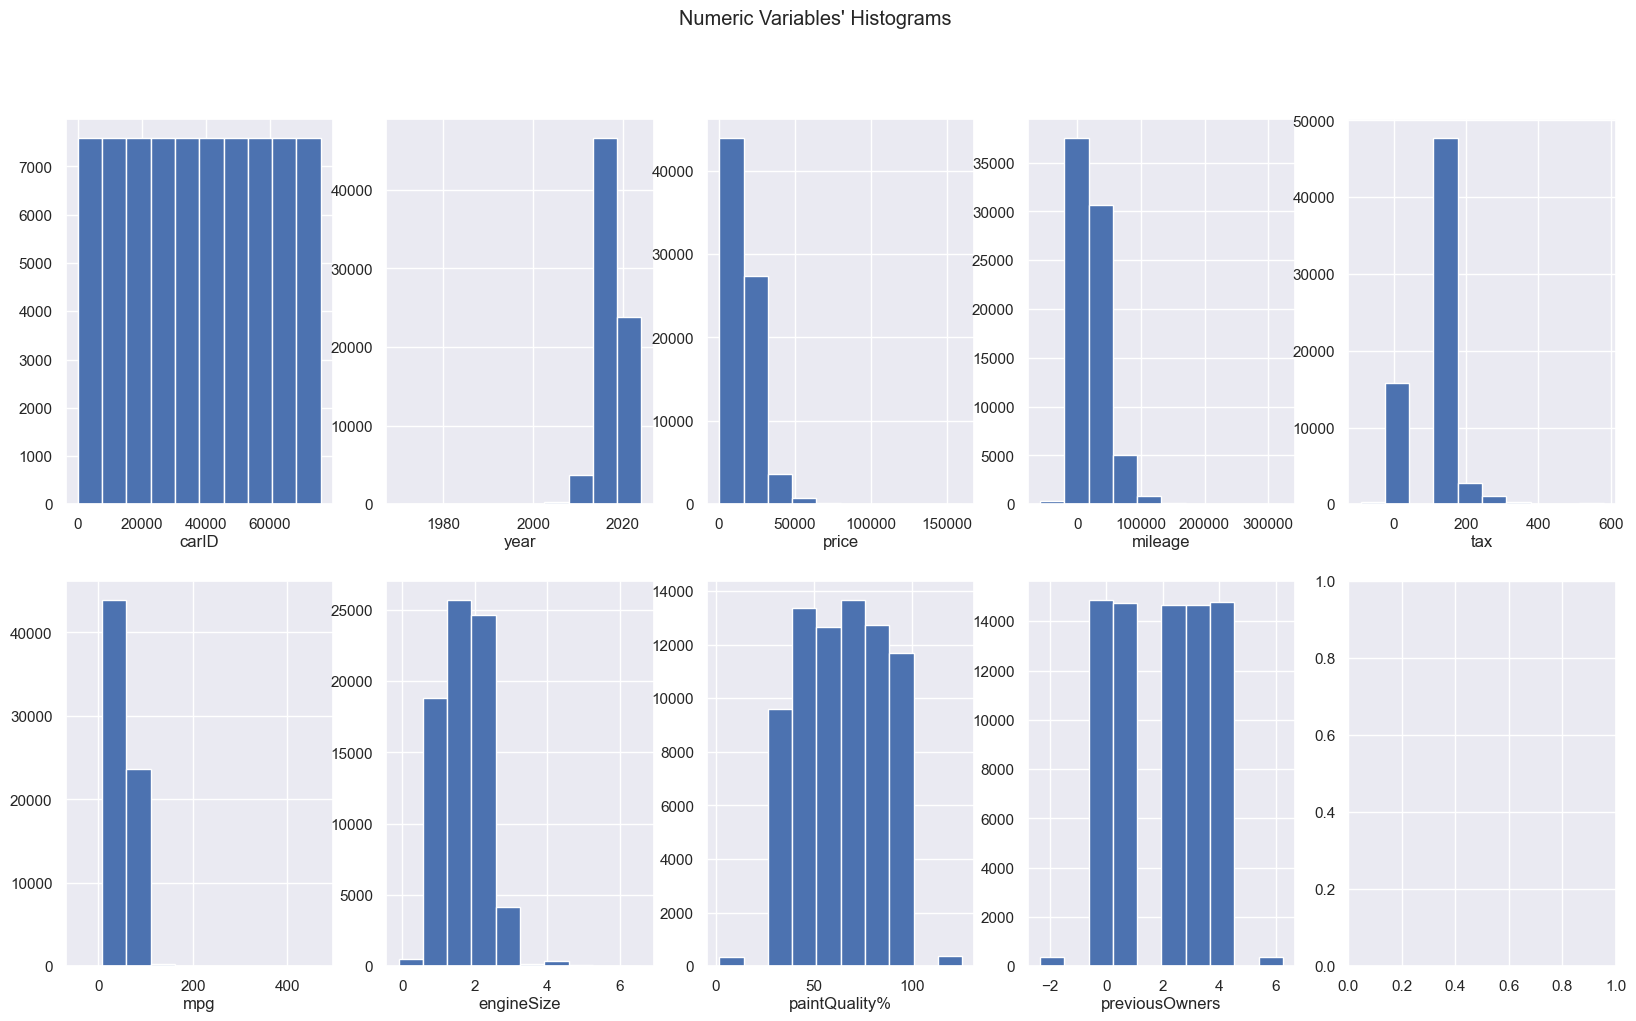

In [29]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(cars[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()